# What are the most required skills for Data Analysts, Data Scientists and Data Engineers in Ukraine? 

## Analysis Plan:

##### 
1. Clean-up skills column
##### 
2. Calculate skill count based on job_title_short
##### 
3. Calculate skill percentage
##### 
4. Plot final insights

In [170]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text



# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 

# Transform job_skills from str to list by using apply method
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [171]:
# Getting data frame specificaly for Ukraine & cleaning it 

df_Ukr = df[df['job_country'] == 'Ukraine']

In [172]:
df_skills = df_Ukr.explode('job_skills')
df_skills = df_skills.dropna(subset=['job_skills'])

df_skills[['job_title','job_skills']]

,job_title,job_skills
914,Senior Certification Manager - Data Science,r
914,Senior Certification Manager - Data Science,python
914,Senior Certification Manager - Data Science,sql
1039,Senior Data Engineer - Internationally-Based A...,python
1039,Senior Data Engineer - Internationally-Based A...,sql
...,...,...
780594,Software Engineer,linux
781080,Team Lead Supply Chain Data Analyst,sql
781080,Team Lead Supply Chain Data Analyst,python
781080,Team Lead Supply Chain Data Analyst,excel


In [173]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending= False, inplace= True)

df_skills_count.head(20)

,job_skills,job_title_short,skill_count
523,python,Data Engineer,236
685,sql,Data Engineer,232
684,sql,Data Analyst,226
522,python,Data Analyst,139
34,aws,Data Engineer,134
664,spark,Data Engineer,115
524,python,Data Scientist,111
721,tableau,Data Analyst,111
166,excel,Data Analyst,104
494,power bi,Data Analyst,103


In [174]:
# Getting TOP 3 jobs from database in Ukraine

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

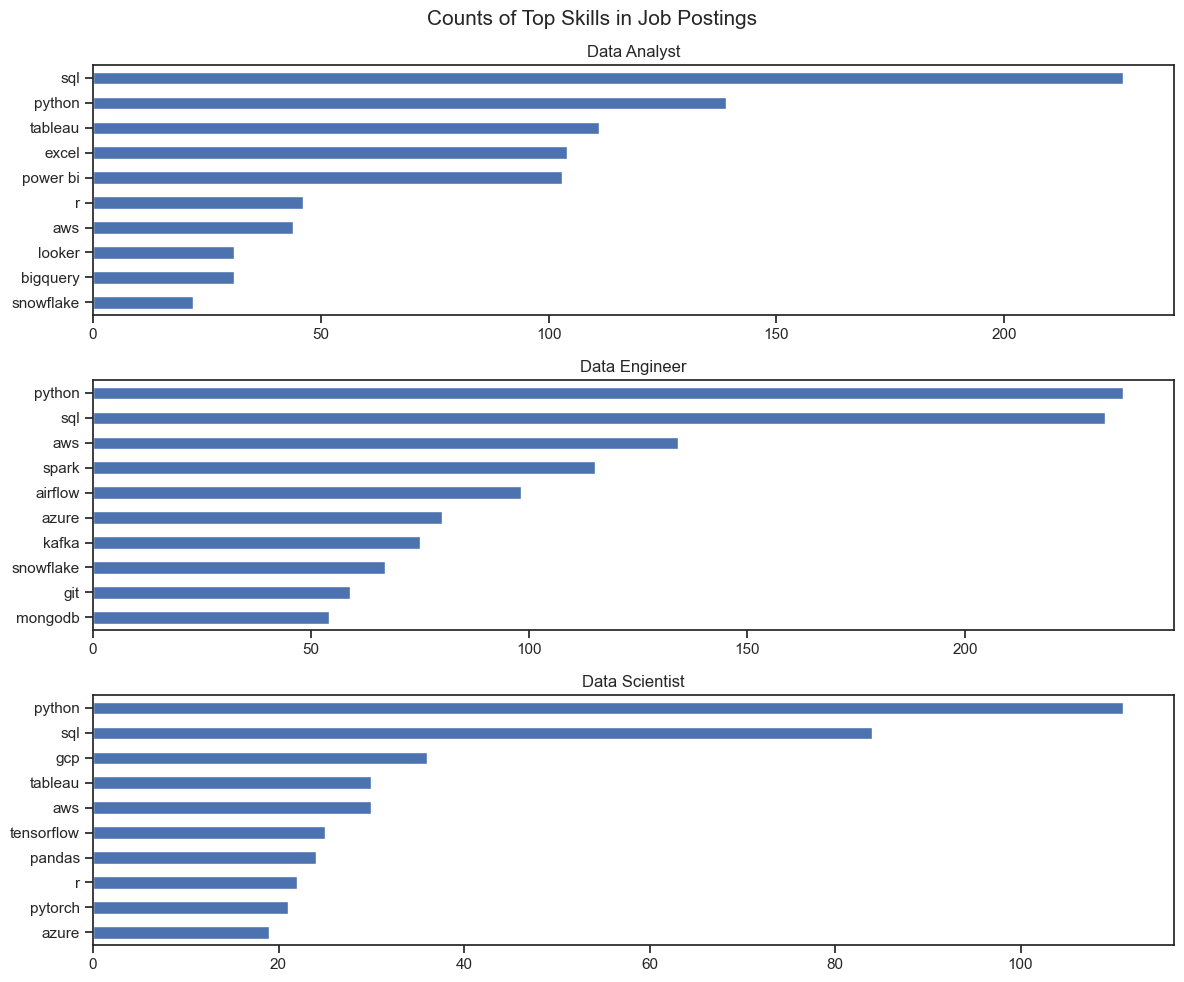

In [175]:
# Plotting


fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 10))

for i, job_titles in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_titles].head(10)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_titles)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

In [195]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [177]:
df_job_title_count = df_Ukr['job_title_short'].value_counts().reset_index(name='jobs_total')

In [178]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,236,374,63.101604
1,sql,Data Engineer,232,374,62.032086
2,sql,Data Analyst,226,473,47.780127
3,python,Data Analyst,139,473,29.386892
4,aws,Data Engineer,134,374,35.828877
...,...,...,...,...,...
787,pandas,Senior Data Analyst,1,41,2.439024
788,css,Senior Data Engineer,1,147,0.680272
789,haskell,Software Engineer,1,259,0.386100
790,shell,Data Analyst,1,473,0.211416


In [179]:
df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,236,374,63.101604
1,sql,Data Engineer,232,374,62.032086
2,sql,Data Analyst,226,473,47.780127
3,python,Data Analyst,139,473,29.386892
4,aws,Data Engineer,134,374,35.828877
...,...,...,...,...,...
787,pandas,Senior Data Analyst,1,41,2.439024
788,css,Senior Data Engineer,1,147,0.680272
789,haskell,Software Engineer,1,259,0.386100
790,shell,Data Analyst,1,473,0.211416


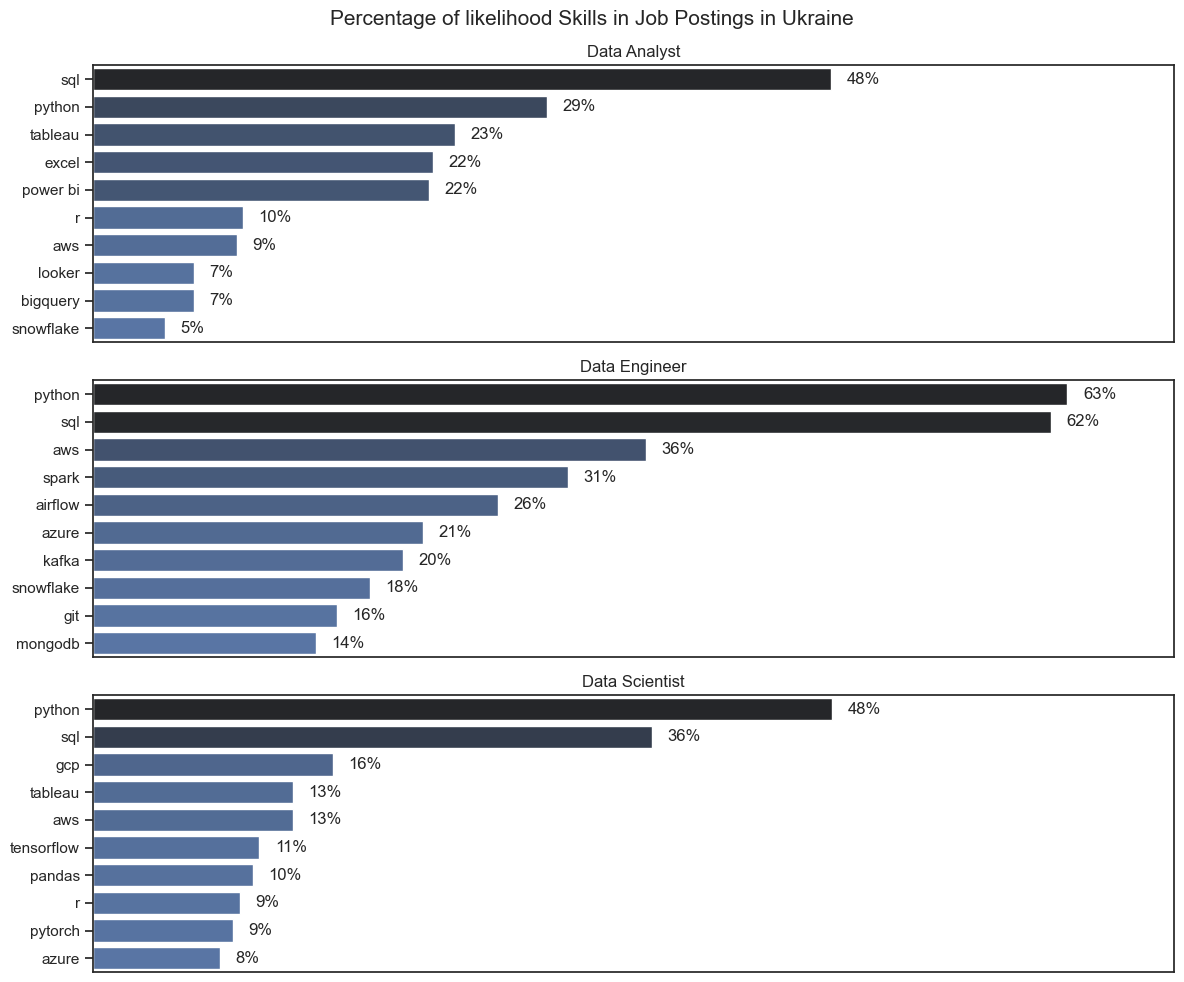

In [196]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 10))

sns.set_theme(style='ticks')

for i, job_titles in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_titles].head(10)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_titles)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_titles)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)


    for n, v, in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Percentage of likelihood Skills in Job Postings in Ukraine', fontsize=15)
fig.tight_layout()
plt.show()